# Instant Ramen Analysis #

Abir Razzak

STAT201 - Business Statistics

### Known Issues ###

1. Output for Top Ten variable explanation has some rows that display as '\n' and is included in the output

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('fivethirtyeight')

# Introduction

Today I will be exploring instant ramen of various countries and how ramen enthuistasts rate these ramen by country. The data I will be using in this notebook comes from Kaggle: [Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings).


Let's begin by reading the data in and taking a look at the first few rows.

In [2]:
df = pd.read_csv('razzak_abir_stat201FinalProject.csv')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


# Data Cleanup

Let's clean up the data a bit. First I'll start with converting any non-numeric values in the 'Stars' row to NaN (stands for "Not a Number"), to make calculations possible.

In [3]:
df.Stars = pd.to_numeric(df.Stars, errors='coerce')

# Variables #

Now that the data is cleaned up, I can now present the descriptive statistics for the columns in the dataset.

### Review # ( Quantitative - Ranked ) ###

'Review #' is the counter variable most likely used to log all the reviews in chronological order. For the sake of this notebook, this variable is useless as we have row numbers built into Python. (Note however, that Python's numbering is indexed starting from 0, not 1)

### Brand ( Categorical - Nominal ) ###

Brand represents the company that makes the ramen that is being reviewed. In the dataset, there are 355 unique brands, with the most rated brand being Nissin, with 381 ratings.

In [4]:
# Brands
print('Number of unique Brands:\t{}'.format(df['Brand'].nunique()))
print('Brand breakdown:\n{}'.format(df['Brand'].value_counts()))

Number of unique Brands:	355
Brand breakdown:
Nissin          381
Nongshim         98
Maruchan         76
Mama             71
Paldo            66
               ... 
Curry Prince      1
GGE               1
Higashi           1
Sanyo Foods       1
Maitri            1
Name: Brand, Length: 355, dtype: int64


### Variety ( Categorical - Nominal ) ###

Variety refers to the flavor of the specific ramen. The variety of a specific ramen is directly linked to the brand, as some brands may be specialty varieties that no other brand may have. Therefore the variety and brand do not vary independently, and are co-dependent on one another. There are 2413 unique varieties in the dataset, with "Beef" and "Chicken" being the most rated ramen varieties.

In [5]:
# Variety
print('Number of unique Varieties:\t{}'.format(df['Variety'].nunique()))
print('Variety breakdown:\n{}'.format(df['Variety'].value_counts()))

Number of unique Varieties:	2413
Variety breakdown:
Chicken                                                      7
Beef                                                         7
Artificial Chicken                                           6
Vegetable                                                    6
Yakisoba                                                     6
                                                            ..
Instant Noodles Prawn Oriental Flavour                       1
Spicy Artificial Beef                                        1
TVP Curry Chicken                                            1
Hu Sesame Flavor                                             1
Japanese Fried Ramen Noodles Kyoto Barbecue Sauce Flavour    1
Name: Variety, Length: 2413, dtype: int64


### Style ( Categorical - Nominal ) ###

This indicates how the instant ramen is prepared by the consumer and packaged by the company. In the dataset, there are 7 different styles of instant ramen. As you'd expect, pack, bowl, and cup are the top 3 styles for instant ramen.

In [6]:
# Style
print('Number of unique Styles:\t{}'.format(df['Style'].nunique()))
print('Variety breakdown:\n{}'.format(df['Style'].value_counts()))

Number of unique Styles:	7
Variety breakdown:
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64


### Country ( Categorical - Nominal ) ###

This indicates in what country the ramen was purchased in. Some ramen varieties are only available in certain countries, therefore we can expect a correlation between the varieties and what country it was purchased in. Japan, USA, and South Korea are the top 3 countries which instant ramen was reviewed. There are 38 different countries included in the dataset.

In [7]:
# Country
print('Number of unique Countries:\t{}'.format(df['Country'].nunique()))
print('Variety breakdown:\n{}'.format(df['Country'].value_counts()))

Number of unique Countries:	38
Variety breakdown:
Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Holland            4
Poland             4
Fiji               4
Sweden             3
Dubai              3
Sarawak            3
Finland            3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64


### Stars ( Likert [Categorical] - Ordinal ) ###

In the ramen reviews, the reviewers must rate the ramen on a scale from 0 (worst) to 5 (best). Here we can see that the overall average rating is a mean of 3.655 (rounded to 3 decimal points) and a median of 3.75. Calculated mode for the ratings is 4.0. Q1 and Q3 are shown below, meaning that 50% of our data lies within the range of 3.25 to 4.25 stars. This means that the ratings are slightly on the higher side, tending to be above what we'd expect average to be (3 being the expected "average" instant ramen).

In [8]:
# Stars
print('\t\tStars')
print('Min:\t\t{}'.format(df['Stars'].min()))
print('Q1:\t\t{}'.format(df['Stars'].quantile(0.25)))
print('Median:\t\t{}'.format(df['Stars'].median()))
print('Mean:\t\t{}'.format(df['Stars'].mean().round(3)))
print('Q3:\t\t{}'.format(df['Stars'].quantile(0.75)))
print('Max:\t\t{}'.format(df['Stars'].max()))
print('Mode:\t\t{}'.format(df['Stars'].mode().values[0]))

		Stars
Min:		0.0
Q1:		3.25
Median:		3.75
Mean:		3.655
Q3:		4.25
Max:		5.0
Mode:		4.0


### Top Ten ( Categorical - Ordinal ) ###

This variable indicates if the ramen that is being reviewed won the Top Ten Instant Ramen award, and if so, in what year did it win in. These ramens will tend to have a higher star rating due to that fact.

In [9]:
df.loc[(df['Top Ten'].notnull()) & (not df['Top Ten'].equals('\n'))]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


# Visualization #

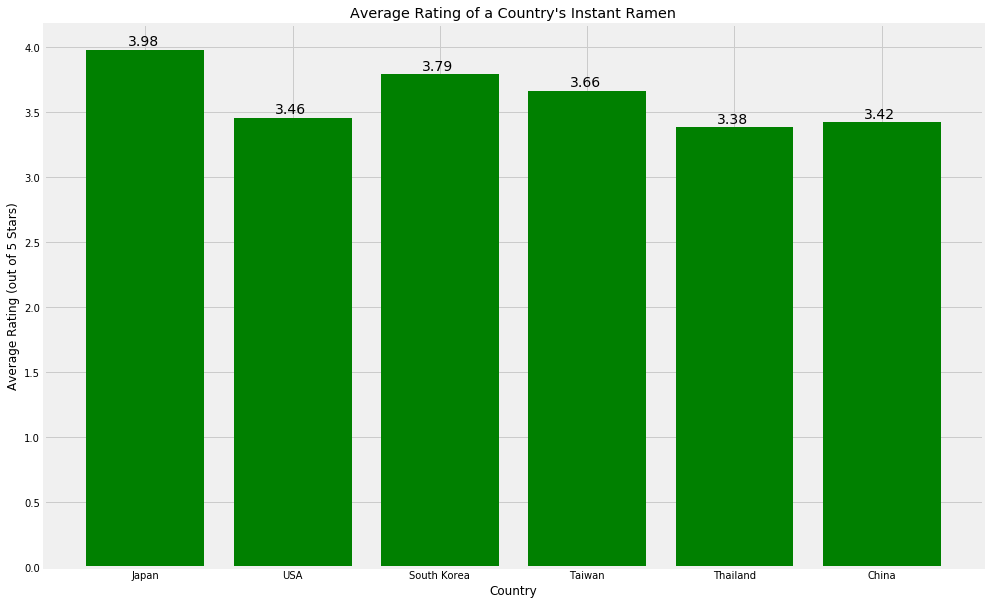

In [10]:
# Calculate the means for the 6 most rated country's instant ramens
countries = ['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 'China']
means = []

japan_mean = df.loc[df['Country'] == 'Japan']['Stars'].mean().round(3)
means.append(japan_mean)

usa_mean = df.loc[df['Country'] == 'USA']['Stars'].mean().round(3)
means.append(usa_mean)

korea_mean = df.loc[df['Country'] == 'South Korea']['Stars'].mean().round(3)
means.append(korea_mean)

taiwan_mean = df.loc[df['Country'] == 'Taiwan']['Stars'].mean().round(3)
means.append(taiwan_mean)

thailand_mean = df.loc[df['Country'] == 'Thailand']['Stars'].mean().round(3)
means.append(thailand_mean)

china_mean = df.loc[df['Country'] == 'China']['Stars'].mean().round(3)
means.append(china_mean)

# Plot a graph
x_pos = [i for i, _ in enumerate(countries)]
f, ax = plt.subplots(figsize=(15,10))
plt.bar(x_pos, means, color='green')
plt.xlabel("Country")
plt.ylabel("Average Rating (out of 5 Stars)")
plt.title("Average Rating of a Country's Instant Ramen")
plt.xticks(x_pos, countries)

# set individual bar labels
# code pulled from: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()+0.03, \
        str(round((i.get_height()), 2)), fontsize=14, color='black', rotation=0)

plt.show()

Here we calculate the mean values of all the star ratings of ramen by country. We visualize the top 6 most rated countries and their means all against each other. From left to right is the most rated (#1 - Japan) to the least rated (#6 - China).

# Analysis #

Here we are trying to find a correlation between Star ratings and Country of instant ramen. Because the data set is consisted of 38 different countries, I narrowed my visualization down to the top 6 most rated ones and focused in on those. Here in the bar graph, we can see that Japan is both the number 1 most rated instant ramen, as well as having the highest mean star score. This was a bit expected as ramen culture in Japan is very prevelant compared to countries like the United States, where convience foods usually comes in cans, and consist of a variety of different instant foods. In fact, in the analysis of the 'Top Ten' variable we can see that Japan has won a total of 6 Top Ten's, all being ranked 4.00 or higher, this data definetly helped brought their mean score higher overall, however with a total of 352 different ratings for Japan, I highly doubt that those 6 Top Ten's alone could have put Japan in the number 1 stop for highest mean rating within the top 6 most rated countries. South Korea came in at 2nd highest with a mean rating of 3.79 stars, roughly 0.19 stars behind Japan. Ramen, a traditionally Japanese dish to beign with, definetly is doing something right with their instant ramen varieties to be receiving high ratings, and I hope these ratings can spark more competition between countries and brands so that consumers can prosper in the rivalry.